In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

util_perso = os.path.abspath('util/gev')
sys.path.append(util_perso)
util_perso = os.path.abspath('util/processing')
sys.path.append(util_perso)

import time_series
from data_processing import depickle

In [2]:
pcaall_split_0 = depickle('analysis_loadings_selected/PCA_fred/pcaall_split_0.pkl')
pcaall_split_1 = depickle('analysis_loadings_selected/PCA_fred/pcaall_split_1.pkl')
pcaall_split_2 = depickle('analysis_loadings_selected/PCA_fred/pcaall_split_2.pkl')
pcaall_split_3 = depickle('analysis_loadings_selected/PCA_fred/pcaall_split_3.pkl')
pcaall_split_4 = depickle('analysis_loadings_selected/PCA_fred/pcaall_split_4.pkl')
pcaall_split_5 = depickle('analysis_loadings_selected/PCA_fred/pcaall_split_5.pkl')
pcaall_split_6 = depickle('analysis_loadings_selected/PCA_fred/pcaall_split_6.pkl')
pcaall = depickle('analysis_loadings_selected/PCA_fred/pcaall.pkl')

pca_split_0 = pd.DataFrame(pcaall_split_0['2m_dewpoint_temperature_max'].components_[:,:10], columns=[f'PCA_{i+1}' for i in range(10)])
linear_after_select = depickle('analysis_loadings_selected/PCA_fred/best_linear_afterselect.pkl')

output_type = ['cdf']#, 'max']

splitting = 'no'

for out in output_type:
    loadings_selected = pd.read_csv(f'analysis_loadings_selected/loadings_selected_{out}.csv')
    loadings_selected[["var_name", "PC"]] = loadings_selected["selected_pc"].str.rsplit("_PC", n=1, expand=True)
    loadings_selected["PC"] = "PC" + loadings_selected["PC"]
    loadings_selected = loadings_selected.drop(columns=["selected_pc"])

    scores = {}  # dictionary to store dataframes
    loadings = {}  # dictionary to store dataframes

    # load the pca scores
    for var in loadings_selected['var_name']:
        #if  var.startswith('10m_'):
        #    continue
        #if var.startswith('mean_sea_level_pressure_min'):
        #    continue
        if splitting == 'yes':
            seed = loadings_selected[loadings_selected['var_name'] == var]['seed'].values[0]
            scores[var] = pd.DataFrame(locals()[f'pcaall_split_{seed}'][var].components_[:,:10], columns=[f'PCA_{i+1}' for i in range(10)])
        else:
            loadings[var] = pd.read_csv(f'data/PCA/PCA_loadings_1000/{var}.csv').drop(columns=['variable'])
            scores[var] = pd.DataFrame(locals()[f'pcaall'][var].components_[:10,:].T, columns=[f'PCA_{i+1}' for i in range(10)])
        #loadings[var] = pd.read_csv(f'data/PCA/PCA_loadings_1000/{var}.csv').drop(columns=['variable'])

    locals()[f'loadings_selected_{out}'] = loadings_selected
    locals()[f'scores_{out}'] = scores
    locals()[f'loadings_{out}'] = loadings

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Shape of the scores

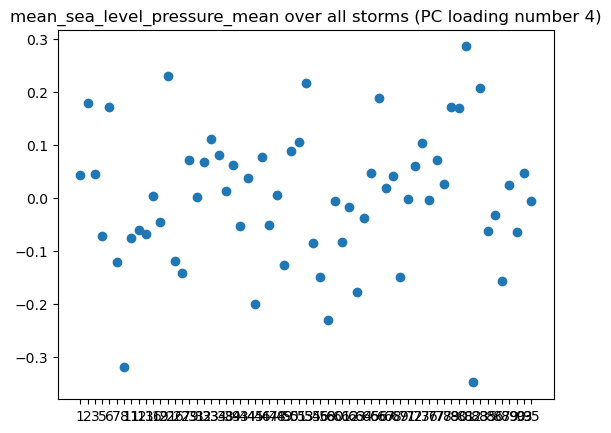

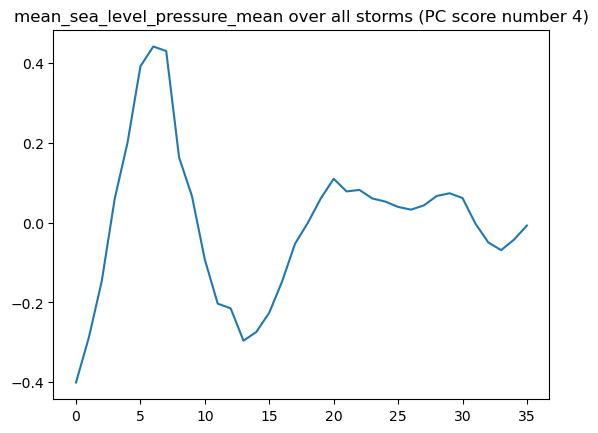

In [ ]:
mean_sea_level_pressure_mean_sc = scores['mean_sea_level_pressure_mean']
mean_sea_level_pressure_mean_lo = loadings['mean_sea_level_pressure_mean']
pc_n = int(loadings_selected[loadings_selected['var_name'] == 'mean_sea_level_pressure_mean']['PC'].values[0].split('PC')[1])

mean_sea_level_pressure_mean_pc = mean_sea_level_pressure_mean_lo.iloc[pc_n-1,:]
plt.scatter(mean_sea_level_pressure_mean_lo.columns, mean_sea_level_pressure_mean_pc)
plt.title('mean_sea_level_pressure_mean over all storms (PC loading number 4)')
plt.show()

mean_sea_level_pressure_mean_score_pc = mean_sea_level_pressure_mean_sc['PCA_4']
plt.plot(mean_sea_level_pressure_mean_score_pc)
plt.title('mean_sea_level_pressure_mean over all storms (PC score number 4)')
plt.show()

['PC3']


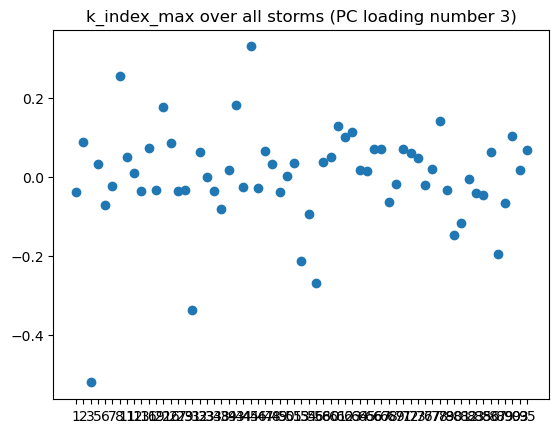

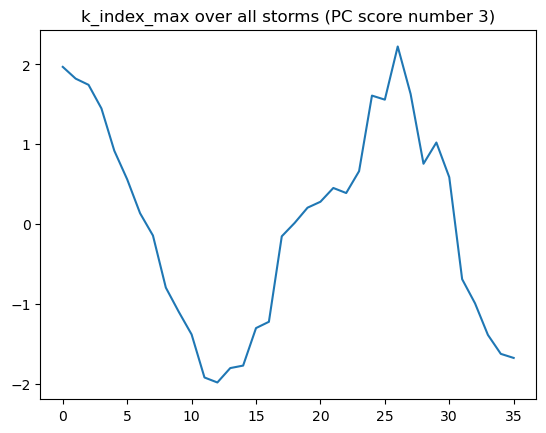

In [49]:
k_index_max_sc = scores['K_index_max']
k_index_max_lo = loadings['K_index_max']
print(loadings_selected[loadings_selected['var_name'] == 'K_index_max']['PC'].values)

k_index_max_pc = k_index_max_lo.iloc[3,:]
plt.scatter(k_index_max_lo.columns, k_index_max_pc)
plt.title('k_index_max over all storms (PC loading number 3)')
plt.show()

k_index_max_score_pc = k_index_max_sc['PCA_3']
plt.plot(k_index_max_score_pc)
plt.title('k_index_max over all storms (PC score number 3)')
plt.show()

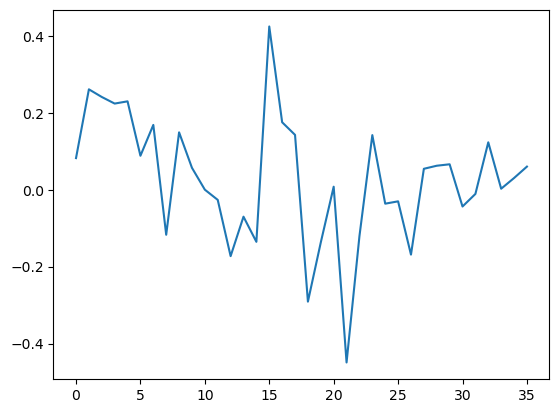

In [10]:
rel_hum_250_std = pcaall_split_6['relative_humidity_250_std'].components_[:,:10]
plt.plot(rel_hum_250_std[:,1])

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


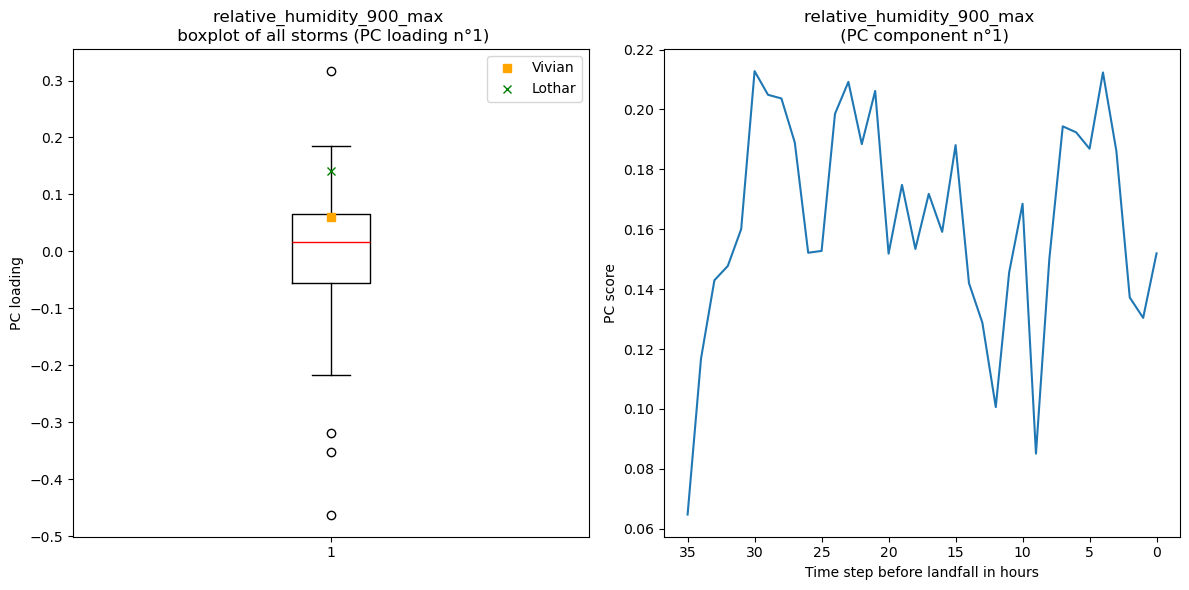

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


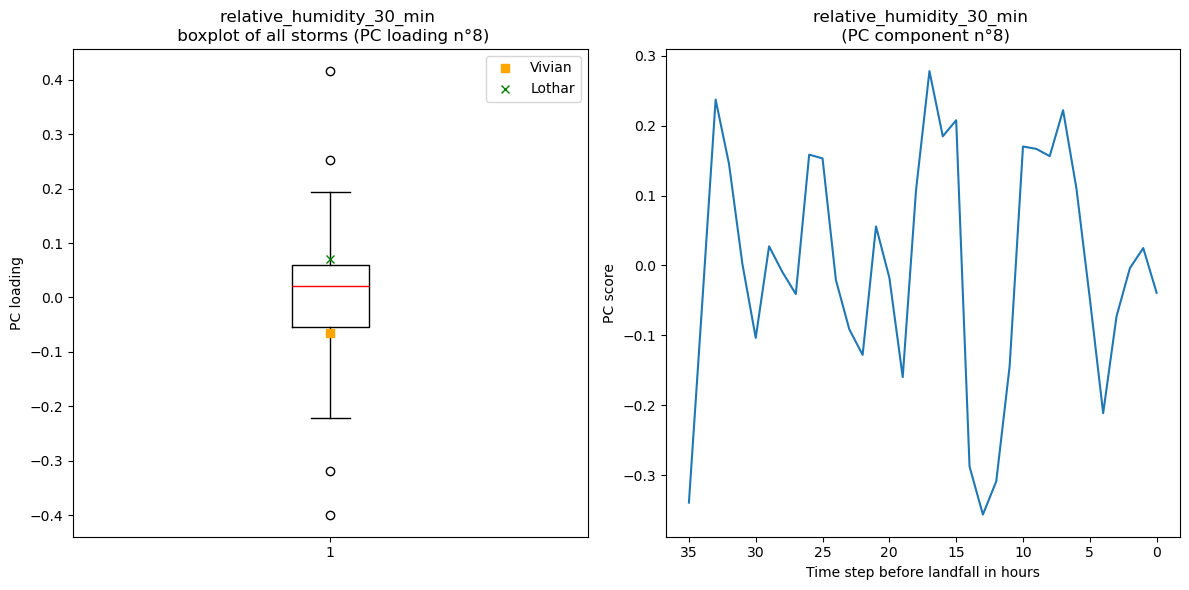

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


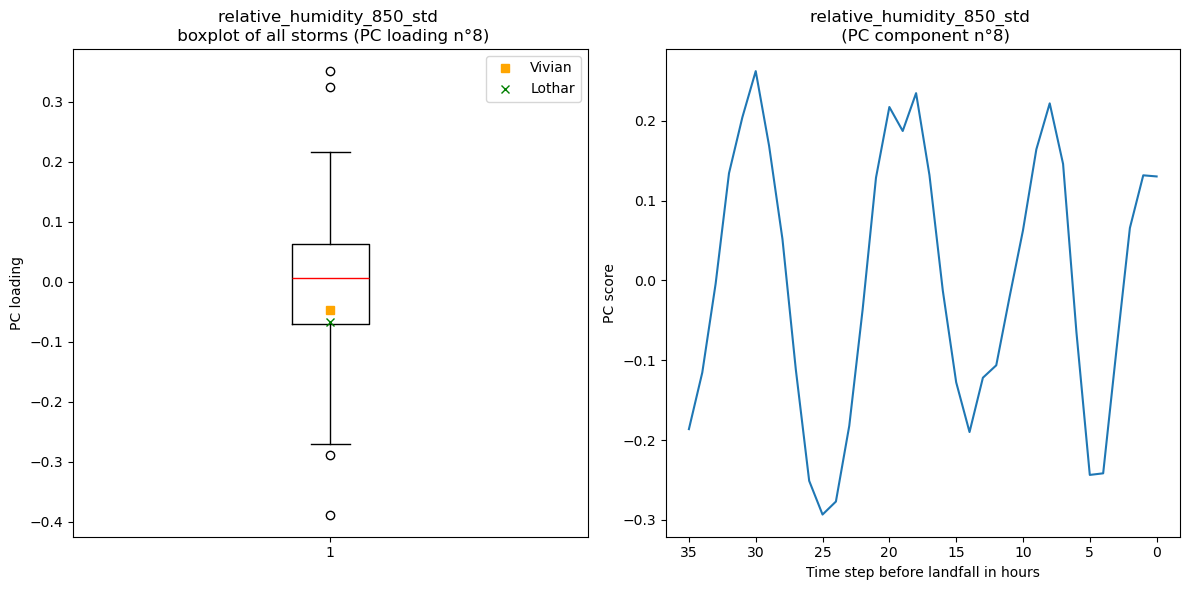

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


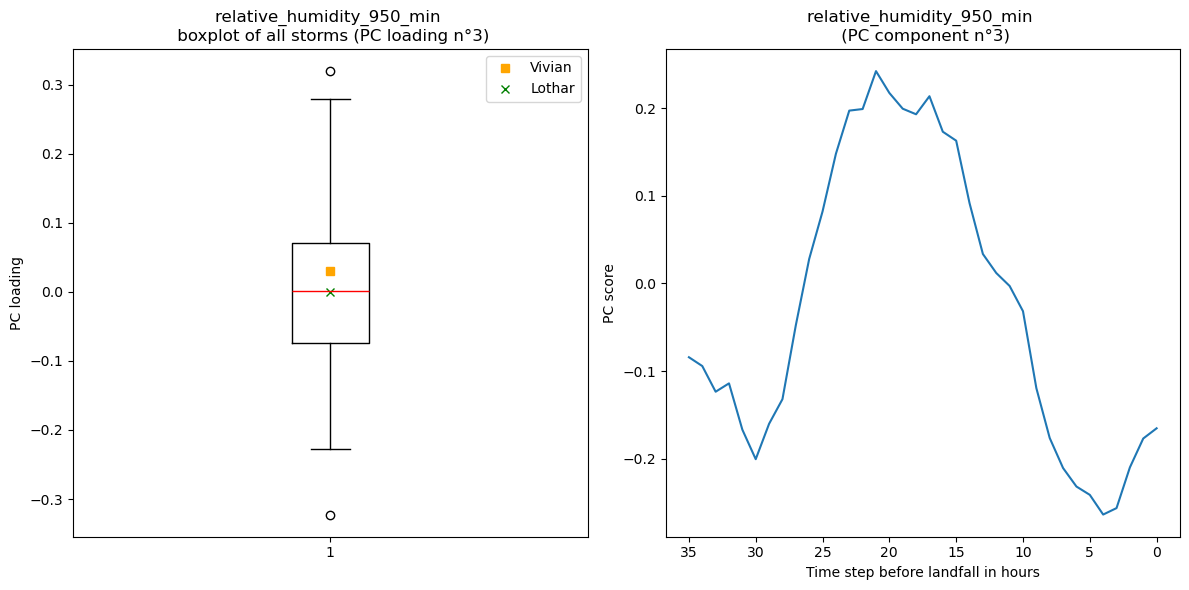

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


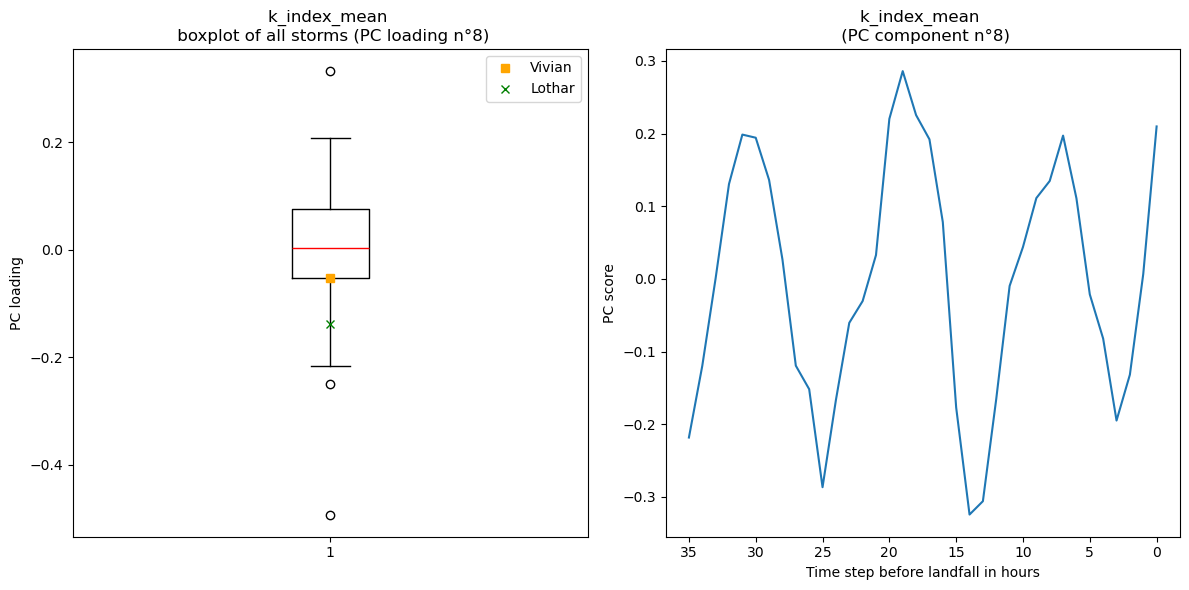

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


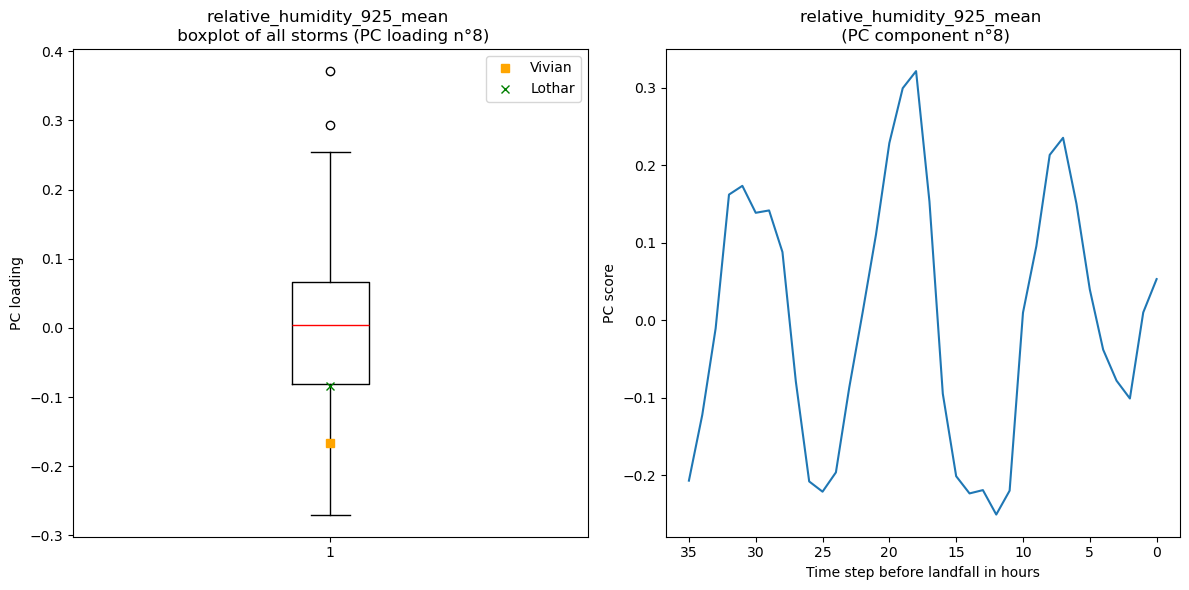

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


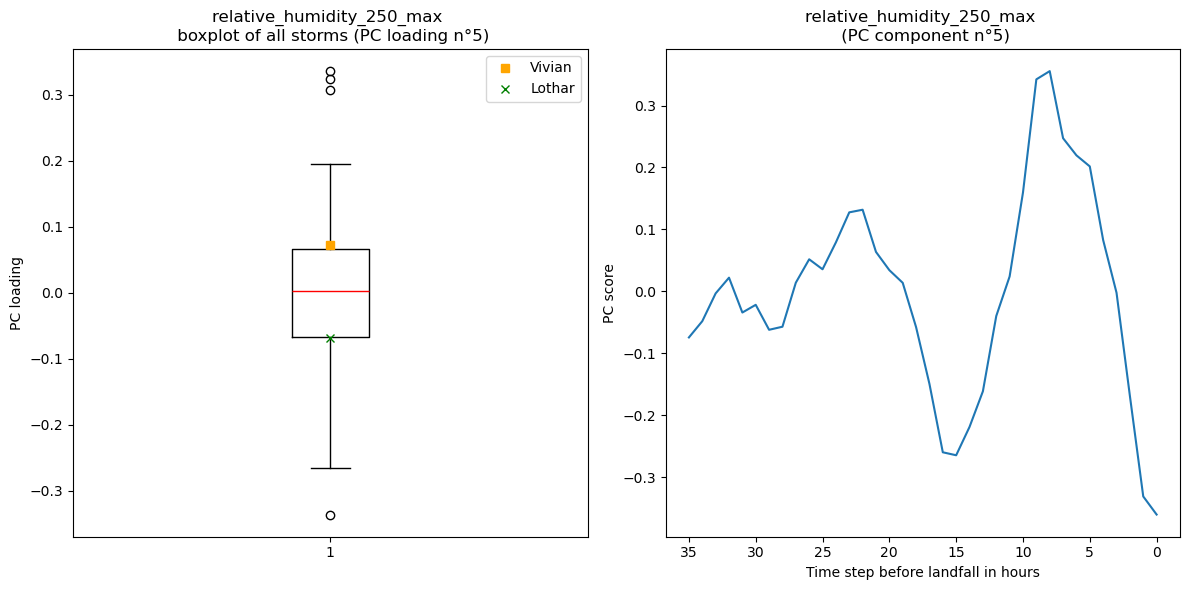

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


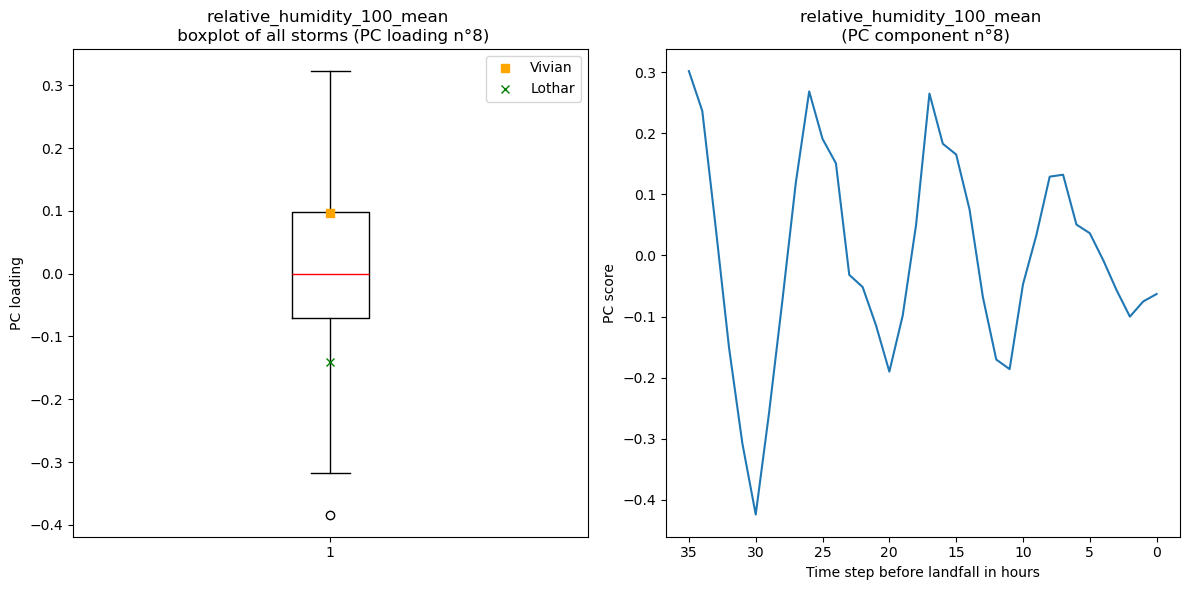

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


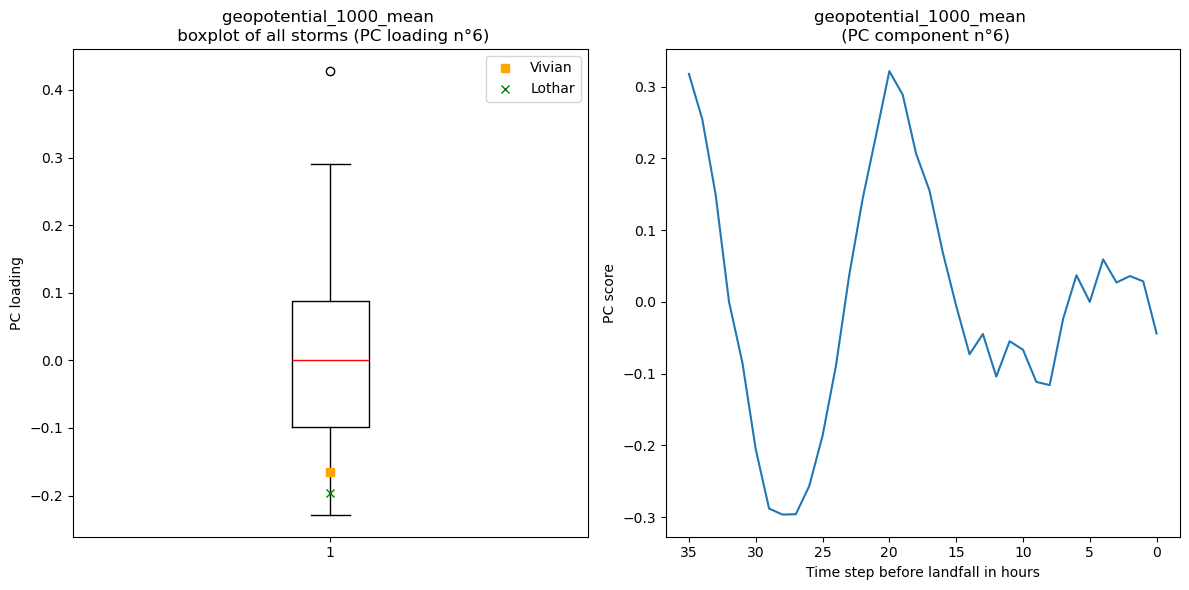

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


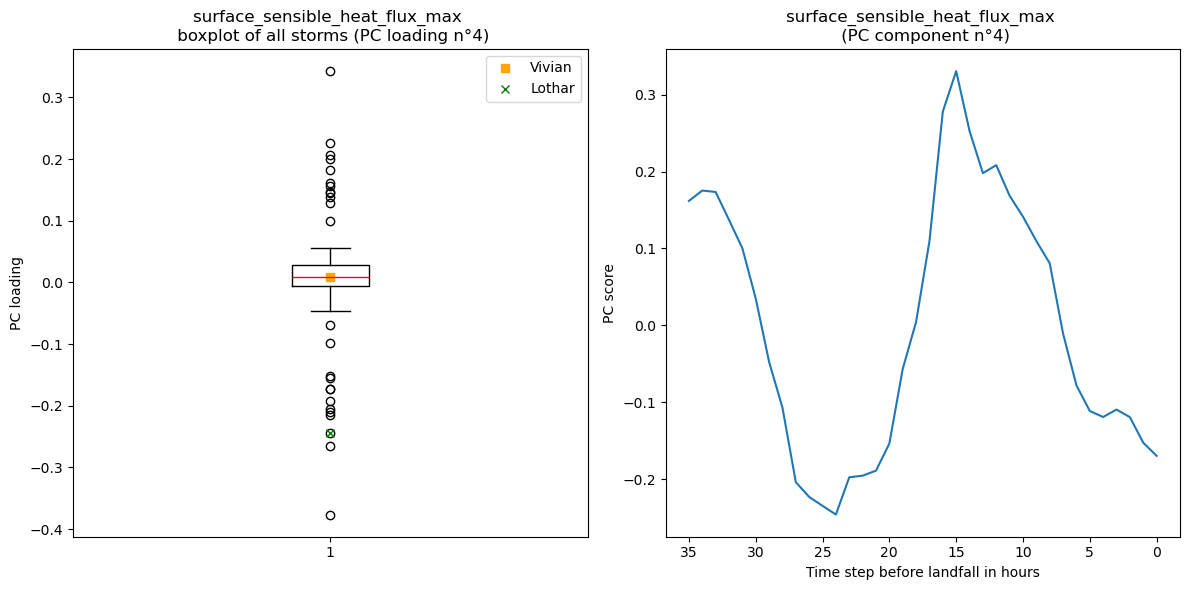

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


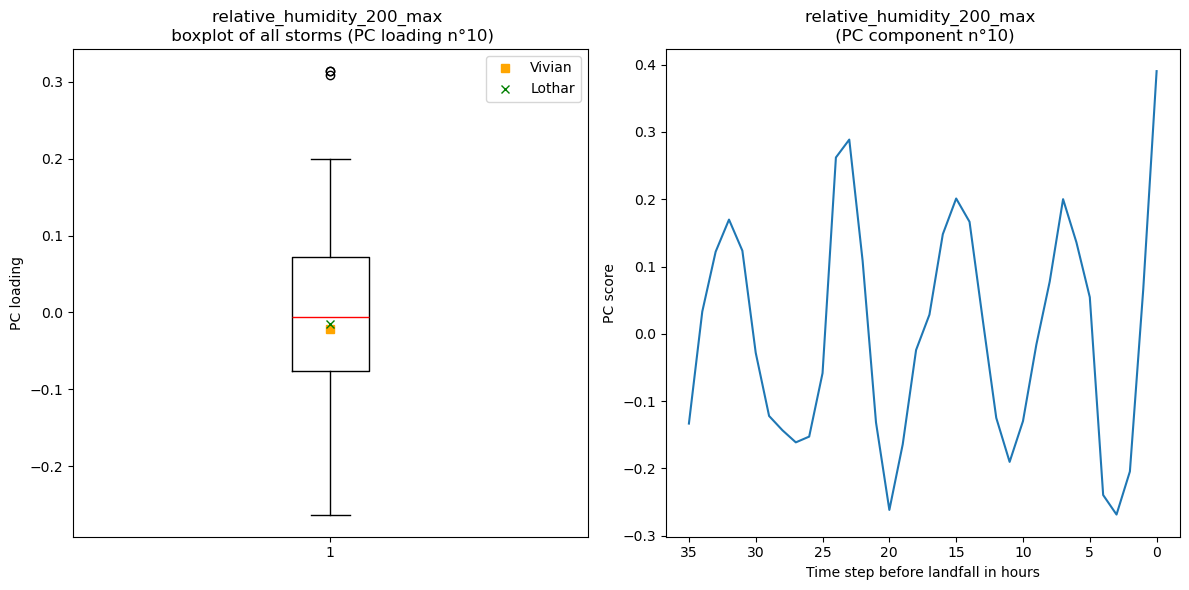

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


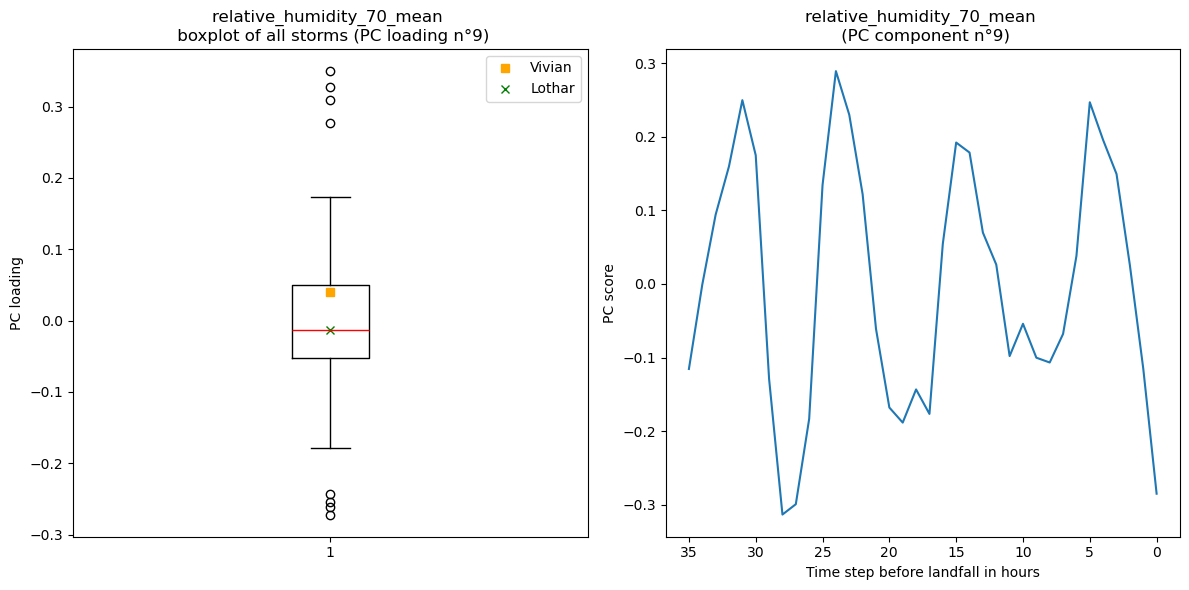

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


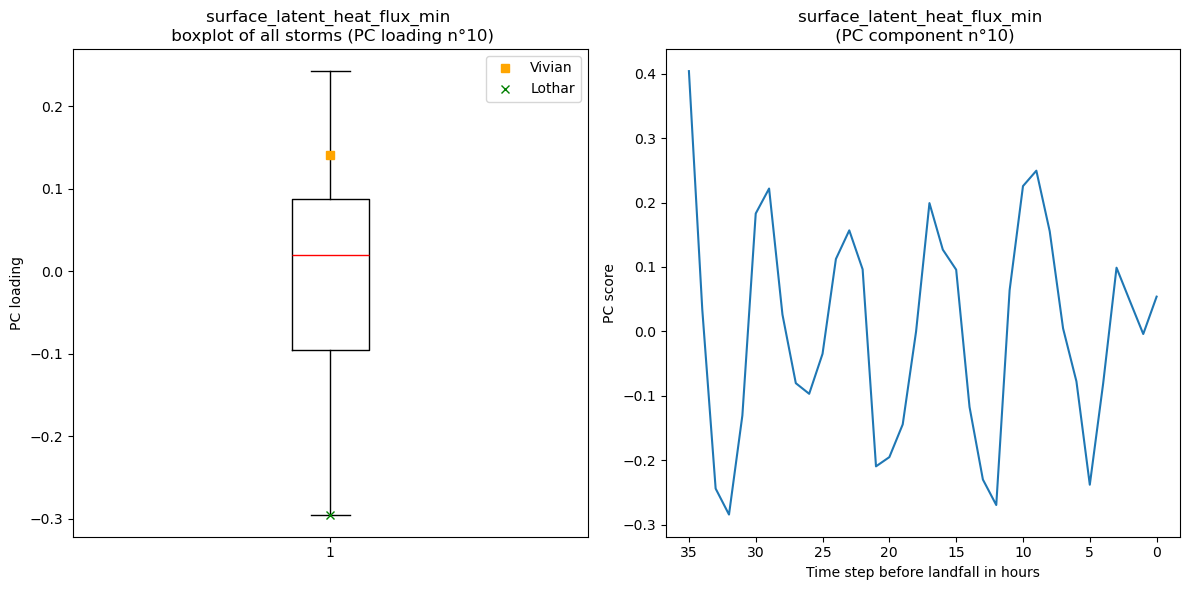

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


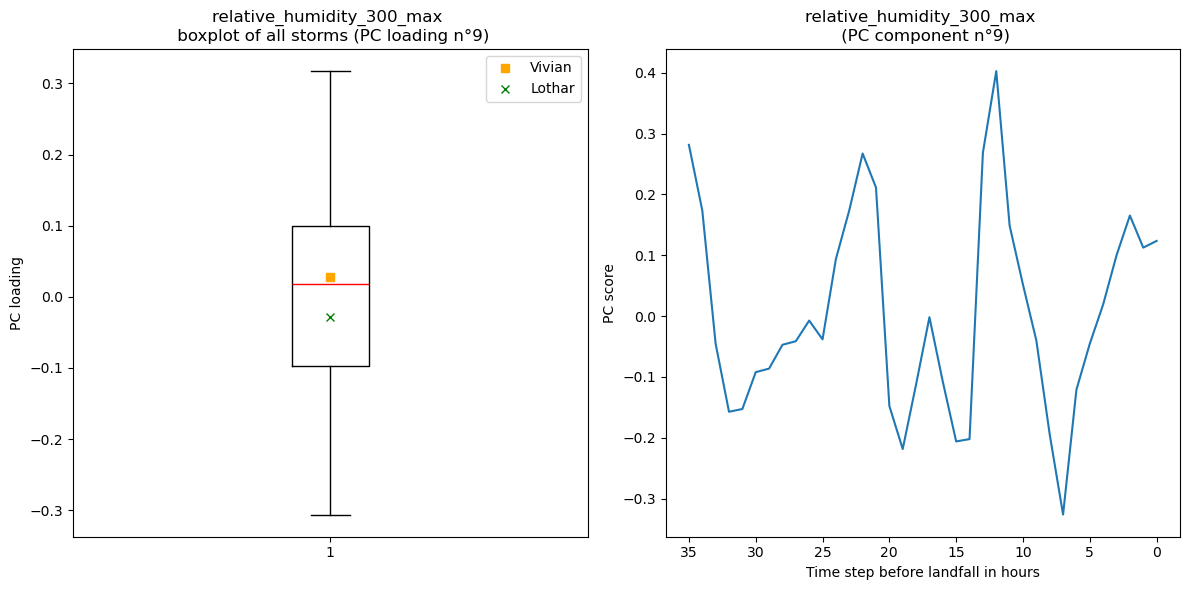

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


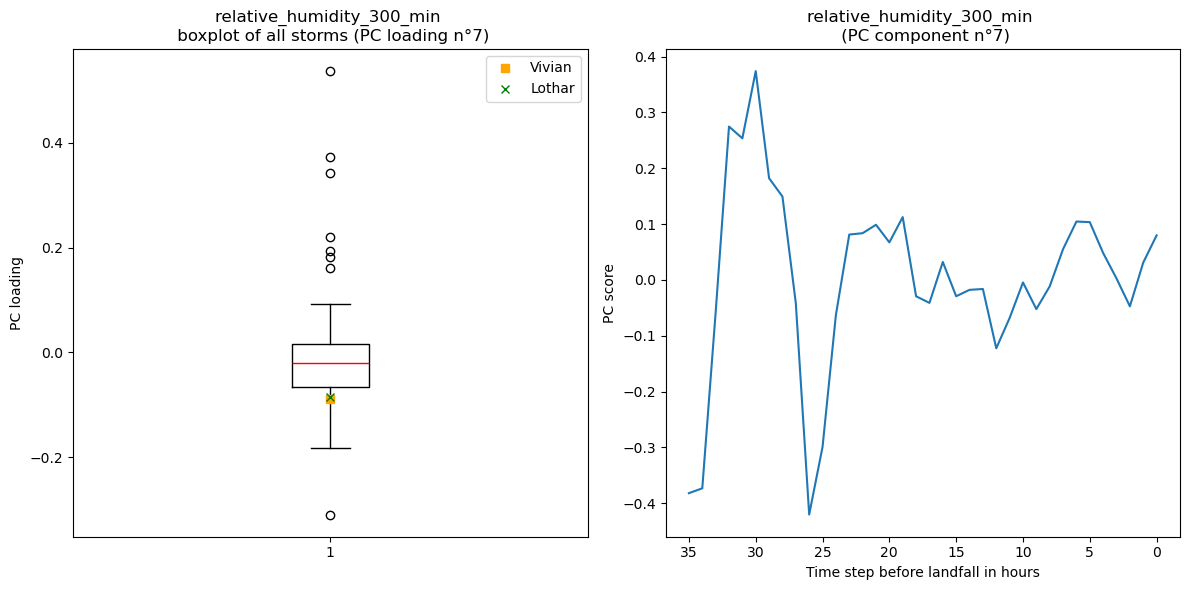

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


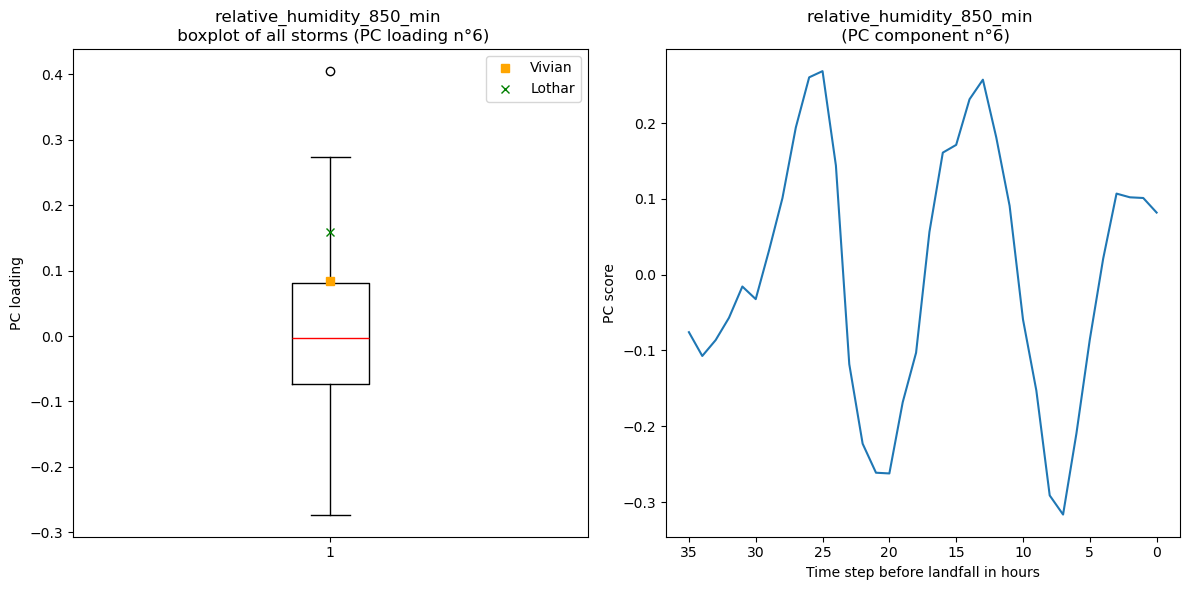

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


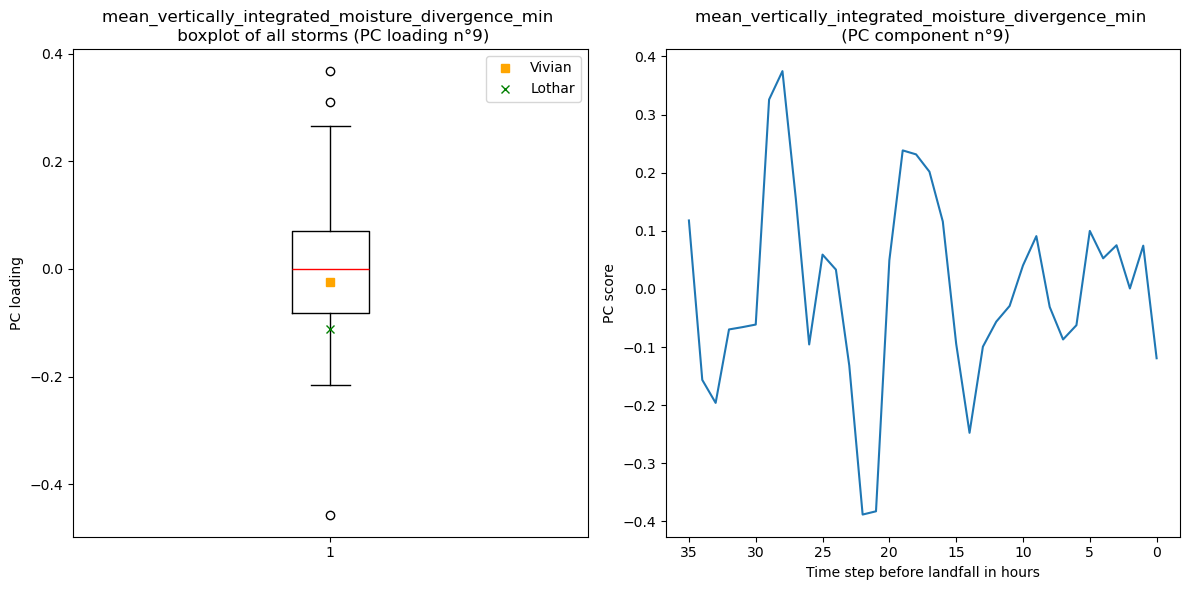

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


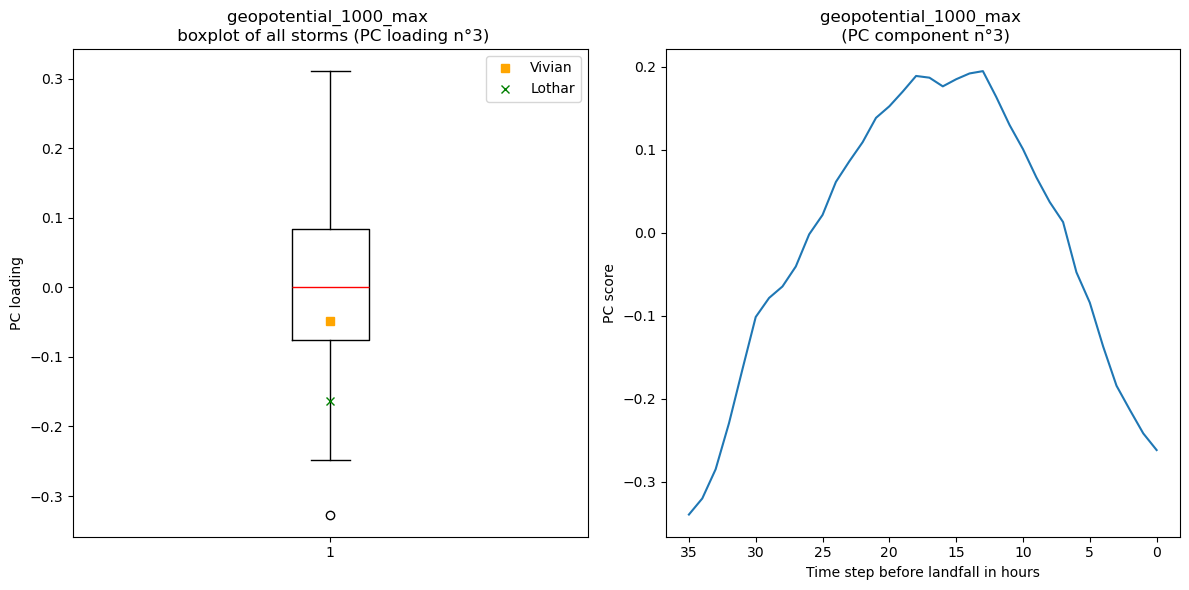

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/2737481128.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


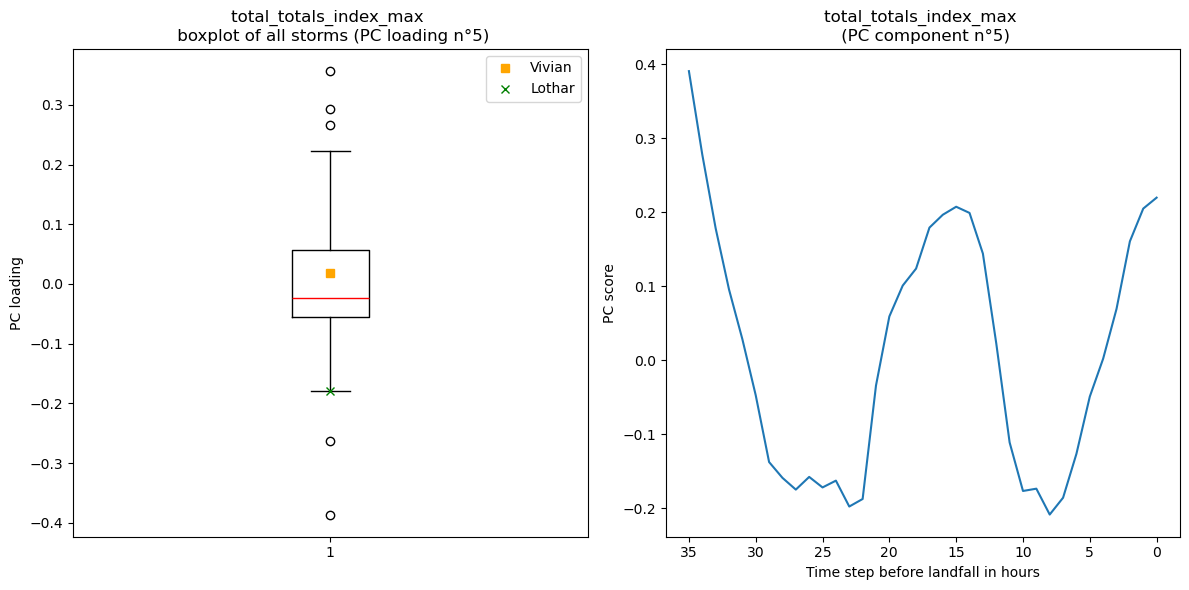

In [3]:
selected_output = loadings_selected_cdf
scores_selected = scores_cdf
loadings_selected = loadings_cdf

for var in selected_output['var_name']:
    #if var.startswith('10m_'):
    #    continue
    temp_scores = scores_selected[var]
    temp_loadings = loadings_selected[var]

    pc_n = int(selected_output[selected_output['var_name'] == var]['PC'].values[0].split('PC')[1])
    if pc_n > 10:
        continue
    var_pc = temp_loadings.iloc[pc_n-1]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Two subplots horizontally
    #axes[0].scatter(temp_loadings.columns, var_pc)
    #axes[0].xaxis.set_tick_params(rotation=45)
    axes[0].set_title(f'{var} \n boxplot of all storms (PC loading n°{pc_n})')
    #axes[0].set_xlabel('Storm number')
    axes[0].boxplot(var_pc, medianprops = dict(color='red'))
    axes[0].set_ylabel('PC loading')
    axes[0].plot(1, var_pc.iloc[5], color='orange', marker='s', label='Vivian', linestyle='none')
    axes[0].plot(1, var_pc.iloc[38], color='green', marker='x', label='Lothar', linestyle='none')
    axes[0].legend()
    #axes[0].set_ylim([-1, 1])

    pc_n = pc_n
    var_score_pc = temp_scores[f'PCA_{pc_n}']
    axes[1].plot(var_score_pc)
    axes[1].set_title(f'{var} \n (PC component n°{pc_n})')
    axes[1].set_xlabel('Time step before landfall in hours')
    # flip the axes so that the time goes from left to right with last step on the right
    axes[1].invert_xaxis()
    axes[1].set_ylabel('PC score')
    axes[1].set_xticklabels(np.arange(-5,40,5))

    plt.tight_layout()
    plt.savefig(f'analysis_loadings_selected/figures/{var}_{pc_n}.png', dpi=300)
    plt.show()

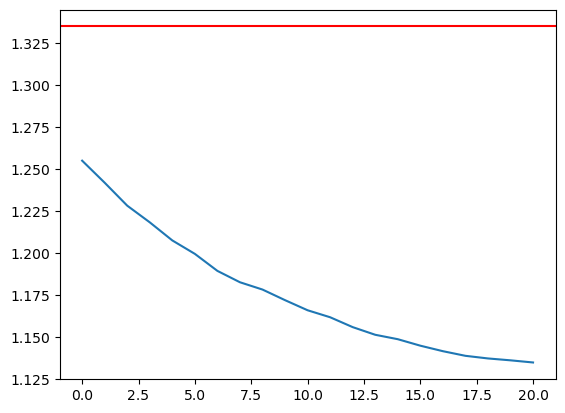

In [79]:
# plot the mean climatology and compare the RMSE from the selected PCA

mean_climatology_RMSE = 1.335
mean_linear_RMSE = loadings_selected_cdf['rmse_val']

plt.plot(mean_linear_RMSE, label='linear regression')
plt.axhline(y=mean_climatology_RMSE, color='r', linestyle='-', label='mean climatology')

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_2219/3256292163.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(np.arange(-5,40,5))


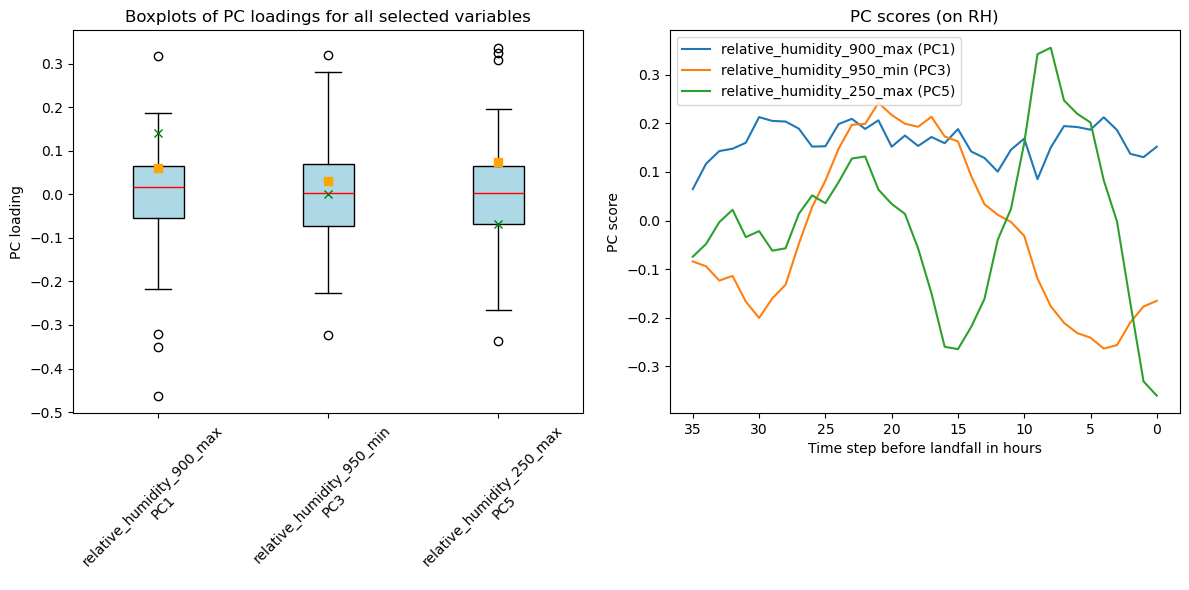

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------
# 1. Create figure and subplots once
# ----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Lists to accumulate data for boxplots
all_box_data = []
var_labels = []

# (Optional) keep track of Vivian and Lothar indices
vivian_idx = 5
lothar_idx = 38

# ---------------------------------------------
# 2. Loop over variables, collect data & plot
# ---------------------------------------------
for var in selected_output['var_name']:
    
    # Example filter: skip if variable name doesn't match
    if not (var.startswith('relative_humidity')):# or var.startswith('total_total') or var.startswith('geopotential')):
        continue
    
    pc_str = selected_output[selected_output['var_name'] == var]['PC'].values[0]  # e.g. "PC2"
    pc_n = int(pc_str.split('PC')[1])
    if pc_n > 5:
        continue
    
    # (A) Extract the *loadings* for this variable and this PC
    temp_loadings = loadings_selected[var]
    var_pc = temp_loadings.iloc[pc_n-1]  # The row corresponding to PC_n
    
    # Accumulate in a list for boxplot
    # (we convert var_pc to numpy or list if needed)
    all_box_data.append(var_pc.values)  
    var_labels.append(f"{var}\nPC{pc_n}")
    
    # (B) Extract the *scores* for this variable and this PC
    temp_scores = scores_selected[var]
    var_score_pc = temp_scores[f'PCA_{pc_n}']
    
    # Plot the PC score in the second subplot
    axes[1].plot(
        var_score_pc, 
        label=f"{var} (PC{pc_n})"
    )

# --------------------------------------------------
# 3. After the loop, plot ALL boxplots at the same time
# --------------------------------------------------
# By default, boxplot expects a list of arrays/lists
bplot = axes[0].boxplot(all_box_data, labels=var_labels, patch_artist=True, medianprops = dict(color='red'))

# You can optionally style your boxplots:
for patch in bplot['boxes']:
    patch.set(facecolor='lightblue')

axes[0].set_title('Boxplots of PC loadings for all selected variables')
axes[0].set_ylabel('PC loading')
axes[0].set_xticklabels(var_labels, rotation=45)

# --------------------------------------------------
# 4. Mark Vivian & Lothar in the boxplots
# --------------------------------------------------
# Because we have multiple boxes (one per var), we have to
# specify x-position of each box. By default: 1..N.
for i, box_data in enumerate(all_box_data, start=1):
    # i is the box position
    if vivian_idx < len(box_data):
        axes[0].plot(i, box_data[vivian_idx], color='orange',
                     marker='s', linestyle='none')
    if lothar_idx < len(box_data):
        axes[0].plot(i, box_data[lothar_idx], color='green',
                     marker='x', linestyle='none')

# -----------------------------------
# 5. Finish up the score (line) plot
# -----------------------------------
axes[1].set_title('PC scores (on RH)')
axes[1].set_xlabel('Time step before landfall in hours')
axes[1].set_ylabel('PC score')
# flip x-axis
axes[1].invert_xaxis()
# optionally change tick labels
axes[1].set_xticklabels(np.arange(-5,40,5))
axes[1].legend()

plt.tight_layout()
plt.show()